<a href="https://colab.research.google.com/github/bilik49/algorithms_itmo/blob/main/algorithms_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import timeit

# Minimum spanning tree

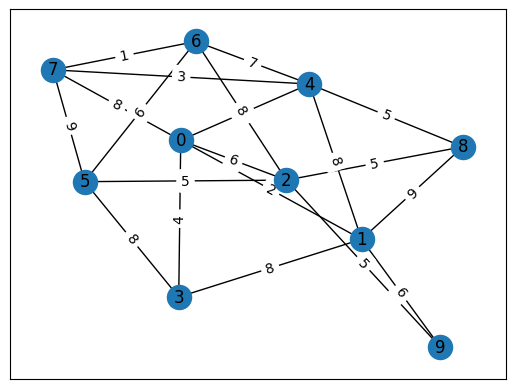

In [2]:
# generate random connected graph
n_v = 10
G = nx.connected_watts_strogatz_graph(n_v, 4, 0.5, seed=None)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = np.random.randint(1,10)

pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)
plt.show()

## Kruskal’s algorithm

In [20]:
class DisjointSetForest:
    def makeset(self, x):
        x['parent'] = x
        x['rank'] = 0

    def findset(self, x):
        if x is not x['parent']:
            x['parent'] = self.findset(x['parent'])
        return x['parent']

    def link(self, x, y):
        if x['rank'] > y['rank']:
            y['parent'] = x
        else:
            x['parent'] = y
            if x['rank'] == y['rank']:
                y['rank'] += 1

    def union(self, x, y):
        self.link(self.findset(x),self.findset(y))

In [21]:
def kruskal(G):
    dsf = DisjointSetForest()
    A = []
    for _ , v in G.nodes(data=True):
        dsf.makeset(v)
    edges = sorted(G.edges(data=True), key=lambda edge: edge[2].get('weight', 1))
    for (u, v, w) in edges:
        if dsf.findset(G.nodes[u]) is not dsf.findset(G.nodes[v]):
            A.append((u,v))
            dsf.union(G.nodes[u], G.nodes[v])
    return A

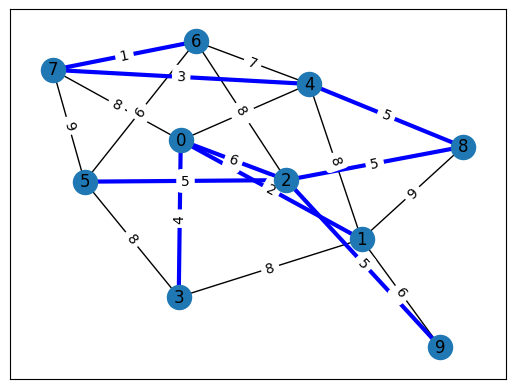

In [5]:
mst_kruskal = kruskal(G)

nx.draw_networkx(G, pos, alpha=1)
nx.draw_networkx_edges(G, pos, edgelist=mst_kruskal, edge_color='b', width = 3)
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)
plt.show()

## Prim’s algorithm

In [6]:
!pip install HeapDict

In [22]:
from heapdict import heapdict
def prim(G, start):
    parent = [None] * G.number_of_nodes()
    pq = heapdict()
    pq[start] = 0

    for u in range(1, G.number_of_nodes()):
        pq[u] = np.inf

    while pq:
        u, w = pq.popitem()
        for v in G.adj[u]:
            if v in pq.d and G[u][v]['weight'] < pq[v]:
                parent[v] = u
                pq[v] = G[u][v]['weight']

    return parent

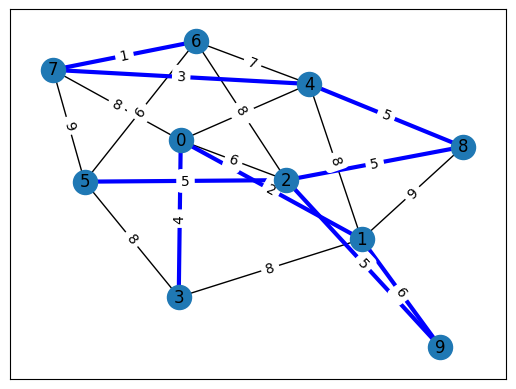

In [8]:
parent = prim(G, 0)

mst_prim = []
for i in range(1, len(parent)):
    mst_prim.append((i, parent[i]))

nx.draw_networkx(G, pos, alpha=1)
nx.draw_networkx_edges(G, pos, edgelist=mst_prim, edge_color='b', width = 3)
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)
plt.show()

## Time complexities

In [23]:
def time_execute(function, n, *args):
    t = 0
    for j in range(n):
        start = timeit.default_timer()
        function(*args)
        end = timeit.default_timer()
        t += end - start
    return t / n

In [24]:
from scipy.optimize import curve_fit
def f(x, k):
    return k * x[0] * np.log(x[1])

In [11]:
def timings_kruskal(n_v):
    timings = []
    n_e = []
    for nv in n_v:
        G = nx.connected_watts_strogatz_graph(nv, 4, 0.5)
        n_e.append(G.number_of_edges())
        for (u, v) in G.edges():
            G.edges[u,v]['weight'] = np.random.randint(1,10)
        timings.append(time_execute(kruskal, 5, G))
    return np.array(timings), np.array(n_e)

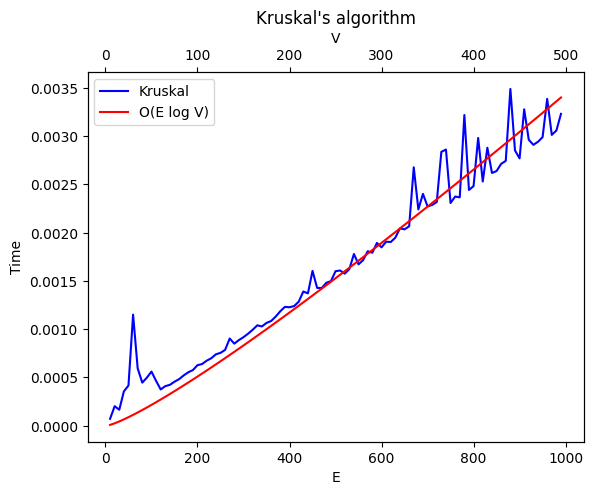

In [16]:
n = 500
n_v = list(range(5, n, 5))
t_kruskal, n_e = timings_kruskal(n_v)

popt_kruskal, _ = curve_fit(f, [n_e, n_v], t_kruskal)

fig, ax1 = plt.subplots()
ax1.set_title('Kruskal\'s algorithm')
ax1.set_ylabel('Time')
ax1.plot(n_e, t_kruskal, 'b', label = 'Kruskal')
ax1.set_xlabel('E')
ax2 = ax1.twiny()
ax2.plot(n_v, f([n_e, n_v], popt_kruskal), 'r', label = 'O(E log V)')
ax2.set_xlabel('V')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2)
plt.show()

In [13]:
def timings_prim(n_v):
    timings = []
    n_e = []
    for nv in n_v:
        G = nx.connected_watts_strogatz_graph(nv, 4, 0.5)
        n_e.append(G.number_of_edges())
        for (u, v) in G.edges():
            G.edges[u,v]['weight'] = np.random.randint(1,10)
        timings.append(time_execute(prim, 5, G, 0))
    return np.array(timings), np.array(n_e)

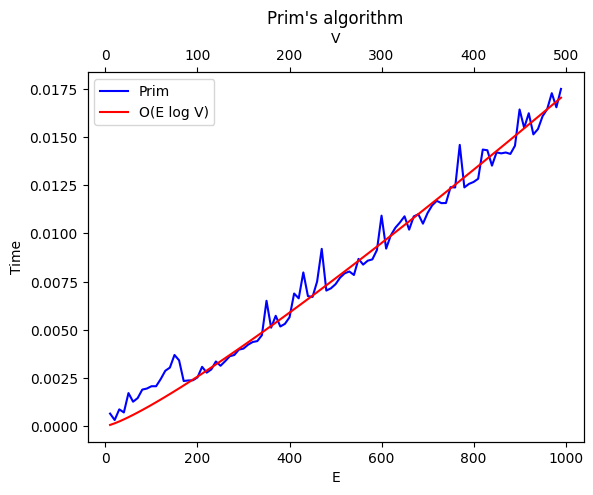

In [18]:
n = 500
n_v = np.array(range(5, n, 5))
t_prim, n_e = timings_prim(n_v)

popt_prim, _ = curve_fit(f, [n_e, n_v], t_prim)

fig, ax1 = plt.subplots()
ax1.set_title('Prim\'s algorithm')
ax1.set_ylabel('Time')
ax1.plot(n_e, t_prim, 'b', label = 'Prim')
ax1.set_xlabel('E')
ax2 = ax1.twiny()
ax2.plot(n_v, f([n_e, n_v], popt_prim), 'r', label = 'O(E log V)')
ax2.set_xlabel('V')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2)
plt.show()

In [25]:
def timings(n_v):
    timings_kruskal = []
    timings_prim = []
    n_e = []
    for nv in n_v:
        G = nx.connected_watts_strogatz_graph(nv, 4, 0.5)
        n_e.append(G.number_of_edges())
        for (u, v) in G.edges():
            G.edges[u,v]['weight'] = np.random.randint(1,10)
        timings_kruskal.append(time_execute(kruskal, 5, G))
        timings_prim.append(time_execute(prim, 5, G, 0))
    return np.array(timings_kruskal), np.array(timings_prim), np.array(n_e)

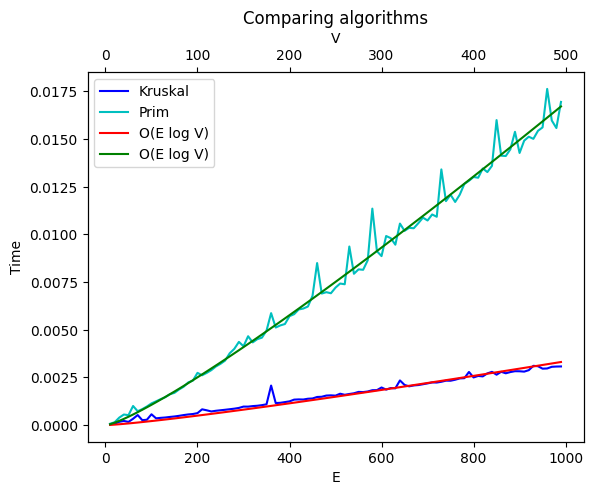

In [28]:
n = 500
n_v = np.array(range(5, n, 5))
t_kruskal, t_prim, n_e = timings(n_v)

popt_kruskal, _ = curve_fit(f, [n_e, n_v], t_kruskal)
popt_prim, _ = curve_fit(f, [n_e, n_v], t_prim)

fig, ax1 = plt.subplots()
ax1.set_title('Comparing algorithms')
ax1.set_ylabel('Time')
ax1.plot(n_e, t_kruskal, 'b', label = 'Kruskal')
ax1.plot(n_e, t_prim, 'c', label = 'Prim')
ax1.set_xlabel('E')
ax2 = ax1.twiny()
ax2.plot(n_v, f([n_e, n_v], popt_kruskal), 'r', label = 'O(E log V)')
ax2.plot(n_v, f([n_e, n_v], popt_prim), 'g', label = 'O(E log V)')
ax2.set_xlabel('V')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2)
plt.show()